[View in Colaboratory](https://colab.research.google.com/github/datalifelab/corso-open-notebook-science/blob/master/monovariata.ipynb)

# Corso su Colaboratory
## Questo notebook contiene alcune librerie per lavorare in modo integrato nell'ecosistema di google drive:
### Aprire fogli di calcolo di google
### Effettuare la pulizia della matrice dall'importazione


In [1]:
%%html
<marquee style='width: 100%; color: blue;'><b>Buon divertimento!!</b></marquee>

In [2]:
#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt

#effettuo l'importazione della libreria per il controllo del sistema operativo
import os
#effettuo l'importazione della libreria statistica Pandas
import pandas as pd
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py

  
from marradi import *
#importa marradi:
# 1 - dist_frequenza(matrice, colonna, save = False, tipo = "categoriale" , lista_ordinale = False):
#    '''
#    matrice: passare un dataframe di pandas
#    colonna: indicare la colonna su cui effettuare la distribuzione di frequenza
#    save: [False oppure nome del file] scegli se salvare o meno la tabella in excel
#    tipo: 
#        "categoriale": classi non ordinate
#        "ordinale": classi ordinate
#        "cardinale": valori numerici
#    lista_ordinale: una lista di valori attraverso il cui ordinare il risultato del tipo ordinale
#    '''


#def tabella_di_contingenza(dataframe, colonna_A, colonna_B, ordine_A = False, ordine_B = False, informativo = False):
#    '''
#    dataframe: inserire la tabella su cui si vuole fare la tabulazione incrociata
#    colonna_A: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
#    colonna_B: inserire la stringa di testo che rappresenta l'intestazione della singola colonna
#    ordine_A: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna A
#    ordine_B: inserire una lista di valori rappresentativi dell'ordine delle categorie della colonna B
#    informativo: True, permette di avere in una stessa tabella frequenze, frequenze attese e scarti. 
#    '''


!pip install git+https://github.com/mwaskom/seaborn.git
import seaborn as sns





!pip install git+https://github.com/mwaskom/seaborn.git
import seaborn as sns

--2018-10-21 07:25:53--  https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3404 (3.3K) [text/plain]
Saving to: ‘marradi.py’

marradi.py          100%[===================>]   3.32K  --.-KB/s    in 0s      

2018-10-21 07:25:58 (65.3 MB/s) - ‘marradi.py’ saved [3404/3404]

  Cloning https://github.com/mwaskom/seaborn.git to /tmp/pip-req-build-4xrgk3ho
  Running setup.py bdist_wheel for seaborn ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-d7de6by4/wheels/4e/57/af/138c7bf2390a67f7010588cf080fb8b4e741bb290c2ad12018
Successfully built seaborn
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.

In [0]:
!pip install --upgrade -q gspread

In [0]:
#Effettuo le librerie che mi autorizzano ad accedere ai file di google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#richiedo le credenziali: apre delle istruzioni e link da seguire per completare
#la procedura
gc = gspread.authorize(GoogleCredentials.get_application_default())



In [0]:
def download_gspread(file_name, sheet_name = "Foglio1", key = False, format = "wide", virgola_italiano = False):
  '''questa funzione, dato il nome del file di google spreadsheet
  e dello specifico foglio di calcolo (opzionale) di google
  restituisce un dataframe di pandas
  file_name: str 
  sheet_name: str
  key: boolean
  format: ["wide", "long", None]
  '''
  
  def str_to_float(cell):
    '''trasforma in decimale 
    tutti i valori stringa contententi 
    valori numerici, anche quelli che hanno punti per migliaia e milioni e virgole
    come decimali'''
    
    try:
      if virgola_italiano == True:
        cell = "".join(cell.split("."))
      else:
        pass
      cell = cell.replace(",", ".")
      cell = cell.strip()
      cell = float(cell)
    except:
      cell = cell
    return cell
  
  #questo comando scarica il foglio 1 del foglio di calcolo
  if key == False:
    if sheet_name == "Foglio1":
      worksheet = gc.open(file_name).sheet1
    else:
      worksheet = gc.open(file_name).worksheet(sheet_name)
  elif key == True:
    if sheet_name == "Foglio1":
      worksheet = gc.open_by_key(file_name).sheet1
    else:
      worksheet = gc.open_by_key(file_name).worksheet(sheet_name)
    
  # prendo tutte le righe del foglio
  rows = worksheet.get_all_values()

  # Converto in DataFrame di Pandas ed effettuo la pulizia dei dati con la funzione
  # str_to_float
  
  dati = pd.DataFrame.from_records(rows)
  if format == "wide":
    dati.columns = dati.loc[0]
    dati = dati.drop(0, axis = 0)  
  else:
    pass
  #converte. dove necessario stringhe verso decimali
  dati = dati.applymap(str_to_float)
  dati = dati.apply(lambda x: pd.to_numeric(x, errors='ignore'))
  return dati

In [0]:
#######
# per iniziare ad operare eliminare le successive righe ed iniziare a lavorare sul proprio progetto
#
#
#######

#generico
#dataset = download_gspread("inserire_nome_foglio_di_calcolo", sheet_name = "inserire_nome_foglio")


In [33]:
#scarico i dati di valutazione del questionario
questionario = download_gspread("1PiMvG2mUAQuWAuZeedL0mTyY1xy9fsggHh64v5D99w0", key = True)

questionario.head(3)

,Informazioni cronologiche,1) Codice classe,Conosci queste tecnologie per l'analisi dei dati? [2_1) Foglio di calcolo (es. excel)],Conosci queste tecnologie per l'analisi dei dati? [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot],Conosci queste tecnologie per l'analisi dei dati? [2_3) Foglio di calcolo - Utilizzo di Macro],Conosci queste tecnologie per l'analisi dei dati? [2_4) Linguaggio e DB SQL],Conosci queste tecnologie per l'analisi dei dati? [2_5) Linguaggio R - Statistica],Conosci queste tecnologie per l'analisi dei dati? [2_6) Linguaggio Python],Conosci queste tecnologie per l'analisi dei dati? [2_7) Software SAS],Conosci queste tecnologie per l'analisi dei dati? [2_8) Software STATA],...,Prima di questa lezione avevi mai sentito parlare di? [4_4) GIS(Geographic information system)],Prima di questa lezione avevi mai sentito parlare di? [4_5) Social Data],Prima di questa lezione avevi mai sentito parlare di? [4_6) Machine Learning],Prima di questa lezione avevi mai sentito parlare di? [4_7) Realtà virtuale],Prima di questa lezione avevi mai sentito parlare di? [4_8) Realtà aumentata],Prima di questa lezione avevi mai sentito parlare di? [4_9) Intelligenza Artificiale],Prima di questa lezione avevi mai sentito parlare di? [4_10) Open Source],Prima di questa lezione avevi mai sentito parlare di? [4_11) Open Science],Prima di questa lezione avevi mai sentito parlare di? [4_12) Open Access],Hai un account google?
1,24/09/2018 17.19.09,Magnier,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,2 -Qualche volta. ma non ho capito bene di cos...,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si
2,24/09/2018 17.19.11,magnier,5 - Ho utilizzato con successo per lavoro o pe...,2 - Ne ho sentito parlare. ma non l'ho mai ut...,2 - Ne ho sentito parlare. ma non l'ho mai ut...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,1 - No mai,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,1 - No mai,1 - No mai,Si
3,24/09/2018 17.19.39,magnier,3 - Ho provato questa tecnologia. ma non sono...,3 - Ho provato questa tecnologia. ma non sono...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,1 - Non ne ho mai sentito parlare prima di que...,...,1 - No mai,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,3 - Si. ne ho sentito parlare nei giornali,1 - No mai,2 -Qualche volta. ma non ho capito bene di cos...,Si


In [35]:
questionario.columns

Index(['Informazioni cronologiche', '1) Codice classe',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_1) Foglio di calcolo (es. excel)]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_2) Foglio di calcolo - Utilizzo di Tabelle Pivot]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_3) Foglio di calcolo - Utilizzo di Macro]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_4) Linguaggio e DB SQL]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_5) Linguaggio R - Statistica]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_6) Linguaggio Python]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_7) Software SAS]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_8) Software STATA]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_9) Software SPSS]',
       'Conosci queste tecnologie per l'analisi dei dati?  [2_10) Software GEPHI (Network Analisys)]',
       'C

In [0]:
def dist_frequenza(matrice, colonna, save = False, tipo = "categoriale" , lista_ordinale = False):
    '''
    matrice: passare un dataframe di pandas
    colonna: indicare la colonna su cui effettuare la distribuzione di frequenza
    save: [False oppure nome del file] scegli se salvare o meno la tabella in excel
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    lista_ordinale: una lista di valori attraverso il cui ordinare il risultato del tipo ordinale
    '''

    frequenza = matrice[colonna].value_counts(dropna = False)
    percentuale = matrice[colonna].value_counts(normalize = True, dropna = False) * 100
    distribuzione = pd.concat([frequenza, percentuale], axis = 1)
    distribuzione.columns = ["Frequenze", "Percentuale"]
    if tipo == "categoriale":
        pass
    elif tipo == "ordinale": 
        try:
            distribuzione = distribuzione.reindex(lista_ordinale)
            distribuzione = distribuzione.fillna(0)
            distribuzione["Cumulata"] = distribuzione["Percentuale"].cumsum()
            
            #distribuzione["cumsum"] = distribuzione[colonna].cumsum()
        except:
            try:
                distribuzione = distribuzione.loc[lista_ordinale]
                distribuzione = distribuzione.fillna(0)
                distribuzione["Cumulata"] = distribuzione["Percentuale"].cumsum()
                
            except:
                print("errore, non corrispondenza con le categorie")
                

    elif tipo == "cardinale":
        distribuzione.sort_index(inplace = True)
        
    try:
        distribuzione["Cumulata"] = distribuzione["Percentuale"].cumsum()
        
    except:
        print("errore nella rimozione dell'incrocio Totale - Cumulata")    


    distribuzione.loc["Totale"] = distribuzione.apply(sum)
    
    distribuzione["Percentuale"] = distribuzione["Percentuale"].round(2)
    try:
      distribuzione["Cumulata"] = distribuzione["Cumulata"].round(2)
      distribuzione.loc["Totale", "Cumulata"] = ""
    except:
      pass
    
    if save == False:
        return distribuzione
    else:
        distribuzione.to_excel(str(save) + ".xlsx")
        return distribuzione

def estrai_valore(cella):
  try:
    return int(cella[0])
  except:
    return cella




In [43]:
ordinate = dist_frequenza(questionario.applymap(estrai_valore),
               "Conosci queste tecnologie per l'analisi dei dati?  [2_1) Foglio di calcolo (es. excel)]",
               tipo = "ordinale",
               lista_ordinale = [1,2,3,4,5,6])

ordinate

,Frequenze,Percentuale,Cumulata
1,0.0,0.00,0
2,5.0,16.67,16.67
3,17.0,56.67,73.33
4,7.0,23.33,96.67
5,1.0,3.33,100
6,0.0,0.00,100
Totale,30.0,100.00,


In [0]:
def plot_dist_frequenza(distribuzione, tipo = "categoriale", Y = "Percentuale", x_label="Valori", y_label="Percentuale"):
  distribuzione = distribuzione.iloc[:-1, :]
  
  print(distribuzione)
  if tipo == "categoriale":
    distribuzione.index = distribuzione.index.map(lambda x: str(x))
    g = sns.barplot(x = distribuzione.index, y=Y, data=distribuzione)
    x = 0
    for index, row in distribuzione.iterrows():
      stringa = "N.{},\n {}%".format(row.Frequenze, row.Percentuale)
      g.text(x,row.Frequenze, stringa, color='black', ha="center")
      x = x + 1
    g.set(xlabel=x_label, ylabel=y_label)
  
  elif tipo == "ordinale" or tipo == "cardinale":
    index = distribuzione.index
    distribuzione.reset_index(inplace = True)
    g = sns.barplot(x = index, y=Y, data=distribuzione, palette="Blues_d")
    for index, row in distribuzione.iterrows():
      stringa = "F.{},\n {}%".format(row.Frequenze, row.Percentuale)
      
      g.text(row.name,row.Frequenze, stringa, color='black', ha="center")
      g.set(xlabel=x_label, ylabel=y_label)
  return g


   Frequenze  Percentuale Cumulata
1        0.0         0.00        0
2        5.0        16.67    16.67
3       17.0        56.67    73.33
4        7.0        23.33    96.67
5        1.0         3.33      100
6        0.0         0.00      100


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


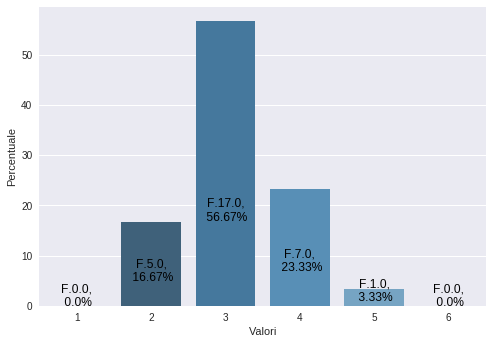

In [185]:
plot_dist_frequenza(ordinate, tipo = "ordinale")

In [0]:
categoriale = dist_frequenza(questionario.applymap(estrai_valore),
               "1) Codice classe",
               tipo = "categoriale")

In [195]:
categoriale

,Frequenze,Percentuale,Cumulata
Magnier,12.0,40.00,40
magnier,12.0,40.00,80
magner,2.0,6.67,86.67
Magner,1.0,3.33,90
manier,1.0,3.33,93.33
Magnete,1.0,3.33,96.67
,1.0,3.33,100
Totale,30.0,100.00,


         Frequenze  Percentuale Cumulata
Magnier       12.0        40.00       40
magnier       12.0        40.00       80
magner         2.0         6.67    86.67
Magner         1.0         3.33       90
manier         1.0         3.33    93.33
Magnete        1.0         3.33    96.67
               1.0         3.33      100


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


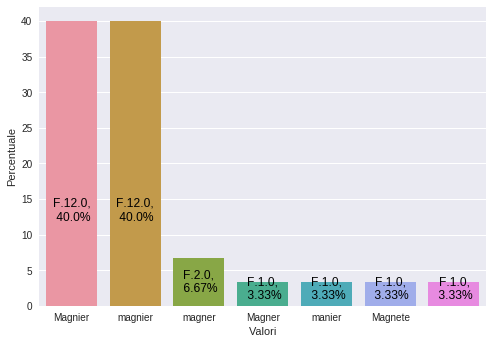

In [196]:
plot_dist_frequenza(categoriale, tipo = "categoriale")

In [0]:
cardinale_freq = pd.DataFrame({"Nome":["Marco", "Piero", "Luigi", "Massimo", "Alberto"], "Età": [34,34,22,32,13]})

In [0]:
cardinale = dist_frequenza(cardinale_freq ,
               "Età",
               tipo = "cardinale")

    Frequenze  Percentuale Cumulata
13        1.0         20.0       20
22        1.0         20.0       40
32        1.0         20.0       60
34        2.0         40.0      100


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


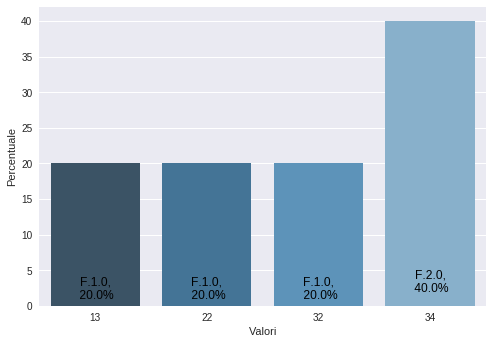

In [205]:
plot_dist_frequenza(cardinale, tipo = "cardinale")

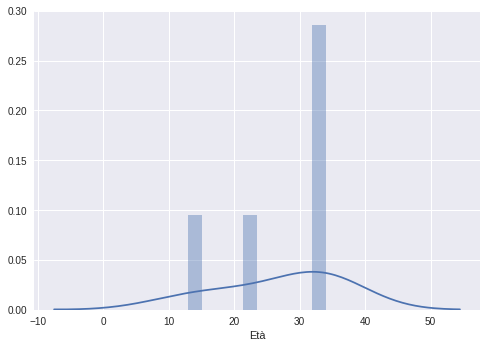

In [209]:
#partire direttamente dai dati in matrice per il distplot
sns.distplot( cardinale_freq["Età"], bins = 10)